In [1]:
import numpy as np
import pandas as pd
import operator
import pickle
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, cross_validation
from sklearn.cross_validation import train_test_split
from sklearn import linear_model

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler, SMOTE
import warnings
warnings.filterwarnings(action='once')

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#with open('../../Data/Opioids/Model_Data/subject_details_age.pickle', 'rb') as pickler:
 #   subject_details = pickle.load(pickler)
subject_details = pd.read_pickle('../../Data/Opioids/Model_Data/subject_details_age.pickle')
subject_details.drop(["AGE"], axis=1, inplace=True)
subject_details.head()

,SUBJECT_ID,GENDER,EXPIRE_FLAG,TOTAL_NARCOTIC_PRESCRIPTONS,TOTAL_ANTI_NARCOTIC_PRESCRIPTONS,NARCOTIC,ANTI-NARCOTIC,ICU_STAY,OXYMORPHONE,OXYCODONE,...,MEPERIDINE,HYDROMORPHONE,HYDROCODONE,FENTANYL,CODEINE,BUPRENORPHINE,METHADONE,NALOXONE,SIDE_EFFECTS_FLAG,AGE_GROUP
0,249,0,0,8.0,0.0,1,0,1,0.0,4.0,...,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,250,0,1,6.0,0.0,1,0,1,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,3
2,252,1,0,4.0,0.0,1,0,1,0.0,0.0,...,2.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,5
3,255,1,0,2.0,0.0,1,0,0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,256,1,0,22.0,0.0,1,0,1,0.0,31.0,...,0.0,5.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,7


In [3]:
x = subject_details.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
subject_details_normalized = pd.DataFrame(x_scaled)
subject_details_normalized.columns=subject_details.columns
subject_details_normalized.drop(["SUBJECT_ID","AGE_GROUP"], axis=1, inplace=True)
subject_details_normalized["AGE_GROUP"] = subject_details["AGE_GROUP"].values
subject_details_normalized["SUBJECT_ID"] = subject_details["SUBJECT_ID"].values
subject_details_normalized.head()

,GENDER,EXPIRE_FLAG,TOTAL_NARCOTIC_PRESCRIPTONS,TOTAL_ANTI_NARCOTIC_PRESCRIPTONS,NARCOTIC,ANTI-NARCOTIC,ICU_STAY,OXYMORPHONE,OXYCODONE,MORPHINE,...,HYDROMORPHONE,HYDROCODONE,FENTANYL,CODEINE,BUPRENORPHINE,METHADONE,NALOXONE,SIDE_EFFECTS_FLAG,AGE_GROUP,SUBJECT_ID
0,0.0,0.0,0.020305,0.0,1.0,0.0,1.0,0.0,0.010499,0.037694,...,0.013857,0.0,0.000000,0.0,0.0,0.090024,0.0,0.0,7,249
1,0.0,1.0,0.015228,0.0,1.0,0.0,1.0,0.0,0.000000,0.004435,...,0.000000,0.0,0.006754,0.0,0.0,0.090024,0.0,0.0,3,250
2,1.0,0.0,0.010152,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.006303,0.0,0.0,0.090024,0.0,0.0,5,252
3,1.0,0.0,0.005076,0.0,1.0,0.0,0.0,0.0,0.010499,0.008869,...,0.000000,0.0,0.000000,0.0,0.0,0.090024,0.0,0.0,7,255
4,1.0,0.0,0.055838,0.0,1.0,0.0,1.0,0.0,0.081365,0.008869,...,0.005774,0.0,0.004052,0.0,0.0,0.090024,0.0,0.0,7,256


In [4]:
cols = subject_details_normalized.columns.tolist()
cols = cols[-1:] + cols[:-1]
subject_details_normalized = subject_details_normalized[cols]
#subject_details_normalized.head()
subject_details_normalized["AGE_GROUP"] = subject_details_normalized["AGE_GROUP"].astype('category', categories=[1,2,3,4,5,6,7,8])
age_group_df = pd.get_dummies(subject_details_normalized["AGE_GROUP"])
age_group_df.columns=["AGE_1", "AGE_2", "AGE_3", "AGE_4", "AGE_5", "AGE_6", "AGE_7", "AGE_8"]
subject_details_normalized = pd.merge(subject_details_normalized, age_group_df, left_index=True, how='left', right_index=True)
subject_details_normalized.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """


,SUBJECT_ID,GENDER,EXPIRE_FLAG,TOTAL_NARCOTIC_PRESCRIPTONS,TOTAL_ANTI_NARCOTIC_PRESCRIPTONS,NARCOTIC,ANTI-NARCOTIC,ICU_STAY,OXYMORPHONE,OXYCODONE,...,SIDE_EFFECTS_FLAG,AGE_GROUP,AGE_1,AGE_2,AGE_3,AGE_4,AGE_5,AGE_6,AGE_7,AGE_8
0,249,0.0,0.0,0.020305,0.0,1.0,0.0,1.0,0.0,0.010499,...,0.0,7,0,0,0,0,0,0,1,0
1,250,0.0,1.0,0.015228,0.0,1.0,0.0,1.0,0.0,0.000000,...,0.0,3,0,0,1,0,0,0,0,0
2,252,1.0,0.0,0.010152,0.0,1.0,0.0,1.0,0.0,0.000000,...,0.0,5,0,0,0,0,1,0,0,0
3,255,1.0,0.0,0.005076,0.0,1.0,0.0,0.0,0.0,0.010499,...,0.0,7,0,0,0,0,0,0,1,0
4,256,1.0,0.0,0.055838,0.0,1.0,0.0,1.0,0.0,0.081365,...,0.0,7,0,0,0,0,0,0,1,0


In [5]:
subjects_with_side_effects = subject_details_normalized[subject_details_normalized["SIDE_EFFECTS_FLAG"] == 1]
print("AGE_1: %i" %len(subjects_with_side_effects[subjects_with_side_effects["AGE_1"] == 1]))
print("AGE_2: %i" %len(subjects_with_side_effects[subjects_with_side_effects["AGE_2"] == 1]))
print("AGE_3: %i" %len(subjects_with_side_effects[subjects_with_side_effects["AGE_3"] == 1]))
print("AGE_4: %i" %len(subjects_with_side_effects[subjects_with_side_effects["AGE_4"] == 1]))
print("AGE_5: %i" %len(subjects_with_side_effects[subjects_with_side_effects["AGE_5"] == 1]))
print("AGE_6: %i" %len(subjects_with_side_effects[subjects_with_side_effects["AGE_6"] == 1]))
print("AGE_7: %i" %len(subjects_with_side_effects[subjects_with_side_effects["AGE_7"] == 1]))
print("AGE_8: %i" %len(subjects_with_side_effects[subjects_with_side_effects["AGE_8"] == 1]))

AGE_1: 0
AGE_2: 7
AGE_3: 254
AGE_4: 203
AGE_5: 251
AGE_6: 26
AGE_7: 7
AGE_8: 1


In [6]:
subjects_without_side_effects = subject_details_normalized[subject_details_normalized["SIDE_EFFECTS_FLAG"] == 0]
print("AGE_1: %i" %len(subjects_without_side_effects[subjects_without_side_effects["AGE_1"] == 1]))
print("AGE_2: %i" %len(subjects_without_side_effects[subjects_without_side_effects["AGE_2"] == 1]))
print("AGE_3: %i" %len(subjects_without_side_effects[subjects_without_side_effects["AGE_3"] == 1]))
print("AGE_4: %i" %len(subjects_without_side_effects[subjects_without_side_effects["AGE_4"] == 1]))
print("AGE_5: %i" %len(subjects_without_side_effects[subjects_without_side_effects["AGE_5"] == 1]))
print("AGE_6: %i" %len(subjects_without_side_effects[subjects_without_side_effects["AGE_6"] == 1]))
print("AGE_7: %i" %len(subjects_without_side_effects[subjects_without_side_effects["AGE_7"] == 1]))
print("AGE_8: %i" %len(subjects_without_side_effects[subjects_without_side_effects["AGE_8"] == 1]))

AGE_1: 269
AGE_2: 246
AGE_3: 2695
AGE_4: 3070
AGE_5: 8256
AGE_6: 5948
AGE_7: 5899
AGE_8: 2860


Considering only ages 3,4,5 and 6

In [7]:
temp_df = subject_details_normalized[subject_details_normalized["SIDE_EFFECTS_FLAG"] == 1]
print(len(temp_df))
subjects_with_side_effects = pd.DataFrame()
subjects_with_side_effects = temp_df[temp_df["AGE_3"] == 1]
subjects_with_side_effects = subjects_with_side_effects.append(temp_df[temp_df["AGE_4"] == 1])
subjects_with_side_effects = subjects_with_side_effects.append(temp_df[temp_df["AGE_5"] == 1])
subjects_with_side_effects = subjects_with_side_effects.append(temp_df[temp_df["AGE_6"] == 1])
len(subjects_with_side_effects)

749


734

In [8]:
temp_df = subject_details_normalized[subject_details_normalized["SIDE_EFFECTS_FLAG"] == 0]
print(len(temp_df))
subjects_without_side_effects = pd.DataFrame()
subjects_without_side_effects = temp_df[temp_df["AGE_3"] == 1]
print(len(subjects_without_side_effects))
subjects_without_side_effects = subjects_without_side_effects.append(temp_df[temp_df["AGE_4"] == 1])
subjects_without_side_effects = subjects_without_side_effects.append(temp_df[temp_df["AGE_5"] == 1])
subjects_without_side_effects = subjects_without_side_effects.append(temp_df[temp_df["AGE_6"] == 1])
len(subjects_without_side_effects)

29243
2695


19969

In [14]:
data = subjects_with_side_effects.append(subjects_without_side_effects)
data = data.sample(frac=1).reset_index(drop=True)
len(data)
X = data[['GENDER', 'EXPIRE_FLAG', 'TOTAL_NARCOTIC_PRESCRIPTONS',
       'TOTAL_ANTI_NARCOTIC_PRESCRIPTONS', 'NARCOTIC', 'ANTI-NARCOTIC',
       'ICU_STAY', 'OXYMORPHONE', 'OXYCODONE', 'MORPHINE', 'MEPERIDINE',
       'HYDROMORPHONE', 'HYDROCODONE', 'FENTANYL', 'CODEINE', 'BUPRENORPHINE',
       'METHADONE', 'NALOXONE', 'AGE_1', 'AGE_2', 'AGE_3', 'AGE_4', 'AGE_5', 'AGE_6', 'AGE_7', 'AGE_8']]
y = data[['SIDE_EFFECTS_FLAG']]
y = y.as_matrix()

In [10]:
with open('../../Data/Opioids/Model_Data/Age_Condensed/subjects_with_side_effects.pickle', 'wb') as pickler:
    pickle.dump(subjects_with_side_effects, pickler, protocol=pickle.HIGHEST_PROTOCOL)
with open('.../../Data/Opioids/Model_Data/Age_Condensed/subjects_without_side_effects.pickle', 'wb') as pickler:
    pickle.dump(subjects_without_side_effects, pickler, protocol=pickle.HIGHEST_PROTOCOL)
with open('.../../Data/Opioids/Model_Data/Age_Condensed/data.pickle', 'wb') as pickler:
    pickle.dump(data, pickler, protocol=pickle.HIGHEST_PROTOCOL)

/anaconda3/lib/python3.6/site-packages/_pytest/fixtures.py:844: DeprecationWarning: The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.
  params = attr.ib(convert=attr.converters.optional(tuple))


FileNotFoundError: [Errno 2] No such file or directory: '.../../Data/Opioids/Model_Data/Age_Condensed/subjects_without_side_effects.pickle'

In [11]:
subjects_with_side_effects.to_pickle('../../Data/Opioids/Model_Data/Age_Condensed/subjects_with_side_effects.pickle')
subjects_without_side_effects.to_pickle('../../Data/Opioids/Model_Data/Age_Condensed/subjects_without_side_effects.pickle')
data.to_pickle('../../Data/Opioids/Model_Data/Age_Condensed/data.pickle')

### Upsampling Minority Class Data

In [15]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components='mle', svd_solver='full')
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply the random over-sampling
#ros = RandomOverSampler(ratio='minority')
#X_resampled, y_resampled = ros.fit_sample(X, y)
sampler = SMOTE()
X_resampled, y_resampled = sampler.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y == 0], X_vis[y == 0], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1], X_vis[y == 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0], X_res_vis[y_resampled == 1],
            label="Class #0", alpha=.5)
ax2.scatter(X_res_vis[y_resampled == 0], X_res_vis[y_resampled == 1],
            label="Class #1", alpha=.5)
ax2.set_title('Random over-sampling')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show() 

ValueError: math domain error

In [68]:
len(y_resampled)

360

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res_vis, y_resampled, test_size=0.2, random_state=42)

# The above returns numpy arrays. Converting them to data frames:
X_train = pd.DataFrame(X_train)   
X_test = pd.DataFrame(X_test)   
Y_train = pd.Series(Y_train)    
Y_test = pd.Series(Y_test)

NameError: name 'X_res_vis' is not defined

In [70]:
warnings.filterwarnings('ignore')
predicted = cross_validation.cross_val_predict(LogisticRegression(), X_res_vis, y_resampled, cv=10)
print("Accuracy Score: %f" %(metrics.accuracy_score(y_resampled, predicted)))
print(metrics.classification_report(y_resampled, predicted))

Accuracy Score: 1.000000
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       180
          1       1.00      1.00      1.00       180

avg / total       1.00      1.00      1.00       360



[[-0.15078987  1.89529141  2.01233518 ...  1.6865177   1.43816055
  -1.63157976]
 [ 0.56412561  1.27775475  1.61999199 ...  0.26385655  1.01872622
  -1.36971764]
 [ 0.02502945  3.51498677  3.04050308 ...  0.87117519  2.061301
  -3.0315291 ]
 ...
 [-0.55434437 -2.43517187  2.09708707 ...  0.42501217 -0.64223984
  -2.20410657]
 [-0.52195175 -2.35775227  2.28256341 ... -0.88239392 -0.31953887
  -2.01013411]
 [-1.23380657 -4.99138984  5.08158322 ...  1.59031385  2.19482269
  -0.28073984]]


ValueError: too many values to unpack (expected 2)

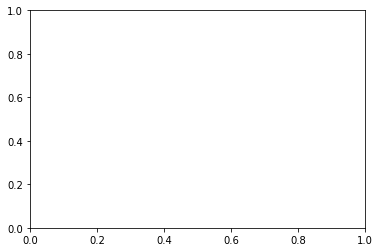

In [81]:

data_resampled = (X_resampled, y_resampled)
colors = ("red", "green")
groups = ("Class 1", "Class 0") 
 
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
 
for data_resampled, color, group in zip(data_resampled, colors, groups):
    print(data_resampled)
    x, y = data_resampled
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
 
plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()

In [78]:
data_resampled = (X_resampled, y_resampled)
x, y = data_resampled